# 2025년 5월 20일 화요일 (18일차)
강사님이 말씀하셨다. 코딩보다 SQL이 더 어렵다고 말이다... 복잡했다. 비절차적인 특징으로 인해서 스크립트 짜는 방법은 매우 다양하며 많은 데이터를 다룰수록 복잡성은 더 높아진다고 하셨다. 
뇌를 그만 굴리고 싶고, 눈도 쉬어주고 싶다.


<br><br><br>

# 📜 목차
- MySQL
  - JOIN 복습 및 더 깊게 들어가기
  - UNION
  - GROUP BY 더 깊게 들어가기
  - EXISTS
  - ANY & ALL
  - MySQL 내장함수
  - CREATE & INSERT & DELETE
  - 5월 20일 과제
    

<br><br><br><br>

# 🟩 DB SQL with MySQL (3일차)

# 🟩 JOIN 복습 및 더 깊게 들어가기

## 🟢 터미널에서 데이터 베이스 보기 
테이터 베이스의 관계성을 파악하여 원하는 데이터를 도출해낼 수 있어야 합니다.

- w3schools 데이터베이스를 보자
  - mysql -u root -p
  - show database;
  - use w3schools;
  - show tables;
+---------------------+
| Tables_in_w3schools |
+---------------------+
| Categories          |
| Customers           |
| Employees           |
| OrderDetails        |
| Orders              |
| Products            |
| Shippers            |
| Suppliers           |
+---------------------+

- desc categories;  -- 특정 데이터 확인

- orders 
  - 주문 아이디, 고객아이디, 선적아이디, 판매자 아이디

- ordersdetails 
  - ordetailID
  - productID
  - quantity
  - orderID (foreign key)

- customers
  - 고객정보
  - customerID (primary key)
  
- employees
  - ....

- inner join (교집합)
- left outer join (왼쪽집합이 다 출력)
- right outer join (오른쪽집합이 다 출력)
- cross join (카테시안곱, 조인조건이 없을 때 n by m)
- self join (자기 테이블끼리 조인을 한다.)


In [ ]:

USE w3schools;

SELECT * FROM customers;
SELECT * FROM orders;
SELECT * FROM orderdetails;
SELECT * FROM customername;

SELECT ORDERID, A.customerid, customername
FROM customers A
JOIN orders B ON A.customerID = B.customerID
WHERE A.customername LIKE '%Handel%';



-- 제품명을 도출하려면???  ->   orders, products, orderdetails
-- 10258, 10263, 10351, 10368, 10382, 10390, 10402, 10403, 10430

SELECT * FROM orders;
SELECT * FROM orderdetails;


SELECT A.orderID, A.productID, productName, Quantity  -- 나는 어떤 물건을 몇개 구매했는데 알고 싶어서 이렇게 
FROM ORDERdetails A
JOIN products B ON A.productID = B.productID
WHERE ORDERID IN (10258, 10263, 10351, 10368, 10382, 10390, 10402, 10403, 10430);


SELECT A.productID, productName, Quantity
FROM ORDERdetails A
JOIN products B ON A.productID = B.productID
WHERE ORDERID IN (          -- 이게 바로 subquery 입니다. / ORDER ID가 이 서브쿼리 결과 내에 존재하는가????
				SELECT ORDERID					-- 존재하는 것만 가져와
				FROM customers A
				JOIN orders B ON A.customerID = B.customerID
				WHERE customername LIKE '%handel%'
);



## 🟢 JOIN 이론

- inner join 의 경우에는 from 절 데이블과 join절 테이블 구분 필요 없음... 데이터 개수가 좀 작은 테이블이 앞쪽에 오는 것이 좋다. (권고사항)
- join
	- for문, nested loop join => hash join

- 보통 내가 작성한 쿼리는 where 조건절이 먼저 실행되서 우선 데이터를 거른 다음에 조인을 한다. 	

- left outer join : from 절에 가까운테이블 내용이 다 나오길 원할 때.
- right outer join : from 절에 먼데이블 내용이 다 나오길 원할 때.
- full outer join : 합집합, ansi 표준은 있는데 mysql 없음.
- cross join


In [ ]:

-- cross join (쉽다)
SELECT A.customerID, B.orderID
FROM customers A, orders B;


-- self join : 자기 테이블에서 join
-- (emp 테이블의 mgr 필드가 자기 상사의 사원번호임) 
-- 동일 테이블을 조인한다고 해서 self join 을 많이 쓴다. 코드테이블 만들 
USE mydb;

SELECT * FROM emp;

-- emp A    mgr   /   emp B   empno     이 2개가 서로 일치해야
SELECT A.ename, A.mgr, B.ename
FROM emp A
LEFT OUTER JOIN emp B ON A.mgr = B.empno;



-- ===================================================
-- 다른 예제 보기 
USE w3schools;

SELECT A.OrderID, B.CustomerName
FROM Orders A
INNER JOIN Customers B ON A.CustomerID = B.CustomerID; 

-- w3schoos 에서 가져온 예
-- SELECT Orders.OrderID, Customers.CustomerName, Shippers.ShipperName
-- FROM ((Orders
-- INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID)
-- INNER JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID); 

-- 서브쿼리와 병합한 형태이지만, 이렇게 쓰는 것보다 join으로만 구성하는 것이 빠르다.
-- SELECT A.OrderID, A.CustomerName, C.ShipperName
-- FROM 
-- ( 
-- 			SELECT 
-- ) A
-- INNER JOIN Customers B ON A.CustomerID = B.CustomerID
-- INNER JOIN Shippers C ON A.ShipperID = C.ShipperID;


-- 결론
SELECT A.orderId, B.CustomerName, C.shippername
FROM orders A, Customers B, Shippers C
WHERE A.customerID = B.customerID
						AND A.shipperID = C.shipperID;
-- join만 쓰는 것이 일반적으로 서브쿼리보다 빠르다.



## 🟢 문제풀어보기 

- employees 테이블에 firstname 이 king 임
  - where E.firstname = 'king'

- 이 사람이 판매한 내역을 확인하고 싶다.
  - 출력: 주문번호, 고객이름, 배달업자, 제품

In [ ]:
SELECT A.EmployeeID, A.Lastname
FROM employees A
WHERE A.Lastname = 'king';

-- 잘 풀었습니다. 하나하나씩 완성해나아가는 방식으로 해보았습니다.
SELECT 
		B.orderid, C.customerName, D.shipperName, F.ProductName
FROM employees A
INNER JOIN ORDERS B ON A.EMPLOYEEID = B.EMPLOYEEID
INNER JOIN customers C ON B.customerID = C.customerID
INNER JOIN shippers D  ON  B.shipperID = D.shipperID
INNER JOIN ORDERDETAILS E ON B.orderID = E.orderID
INNER JOIN products F ON E.productID = F.productID
WHERE A.Lastname like 'King%';  -- 이거 틀렸었습니다.


-- 같이 풀어보기 (위와 결과는 동일)
SELECT A.orderID, C.customername, F.shippername, E.productname
FROM orders A
INNER JOIN employees B ON A.EMPLOYEEID = B.EMPLOYEEID
INNER JOIN customers C ON A.customerID = C.customerID
INNER JOIN ORDERDETAILS D ON A.orderID = D.orderID
INNER JOIN products E ON D.productID = E.productID
INNER JOIN shippers F ON A.shipperID = F.shipperID
WHERE B.Lastname like 'King%';

<br><br><br><br>

# 🟩 UNION

UNION은 두 개 이상의 SELECT 쿼리 결과를 수직으로 합치는 연산자

| 구문          | 설명                             |
| ----------- | ------------------------------ |
| `UNINON`     | **중복 제거**된 결과를 반환              |
| `UNINON ALL` | **중복 허용** (모든 결과를 반환, 성능 더 빠름) |

### 🟡 형태
```sql
SELECT column1, column2 FROM table1
UNION
SELECT column1, column2 FROM table2;
```

### 🟡 조건 및 규칙
1. 컬럼 수가 같아야 합니다.
  - SELECT 절의 컬럼 개수는 같아야 함.

2. 컬럼의 데이터 타입이 호환되어야 합니다.
  - 예: 첫 번째 SELECT의 첫 컬럼이 문자열이면, 두 번째 SELECT의 첫 컬럼도 문자열이어야 함.

3. 컬럼 이름은 첫 번째 SELECT 기준
  - 전체 결과의 컬럼명은 첫 SELECT의 컬럼명만 사용됨.


### 🟡 사용 사례
- 행을 열로 바꿔야 할 때
- 포털사이트, 국가 기관 검색어로 검색하면 각 테이블로부터 검색한 내용을 전부 union해서 갖고 온다.


In [ ]:
-- =====================================
USE mydb;

SELECT empno, ename FROM emp
UNION ALL
SELECT deptno, dname FROM dept;


SELECT count(*) FROM emp
UNION ALL
SELECT count(*) FROM dept;


-- =====================================
USE w3schools;

-- SELECT * FROM Customers LIMIT 10;
-- SELECT * FROM Suppliers LIMIT 10;

SELECT City, Country FROM Customers
WHERE Country='Germany'
UNION ALL
SELECT City, Country FROM Suppliers
WHERE Country='Germany'
ORDER BY City;


<br><br><br><br>

# 🟩 GROUP BY 더 깊게 들어가기

- 같은 값을 가진 행들을 **하나로 묶어서 집계 함수 [예: COUNT(), MAX(), MIN(), SUM(), AVG()]**를 적용할 때 사용


```SQL
SELECT 그룹_기준_컬럼, 집계함수(계산할_컬럼)
FROM 테이블명
GROUP BY 그룹_기준_컬럼;

In [ ]:

-- ===========================================
-- GROUP BY 
-- 나라별로 몇명의 고객이 있는가??
-- 그룹함수 중에 null값 처리부분이 조금씩 다르다.
-- count(필드명) 에 null 값이 존재하면 카운트 하지 않는다. count(*)

SELECT * FROM customers;

SELECT count(*)  -- 전체 고객수
FROM customers ;


SELECT country, count(*)
FROM customers
GROUP BY country;


SELECT country, count(*)
FROM customers
GROUP BY country
ORDER BY count(*) desc;


SELECT A.ORDERID, B.shipperID
FROM ORDERS A
JOIN shippers B ON A.shipperID = B.shipperID;

-- [어렵다]  join 해서 group by 사용 
SELECT B.shippername, count(*)
FROM ORDERS A
JOIN shippers B ON A.shipperID = B.shipperID
GROUP BY shippername;

-- 위에꺼는 쉬운데 여기서 더 데이터가 들어가야 한다면....
-- ex) 주문번호, 배달업체, 배달업체 카운트를 도출하고 싶
SELECT B.shippername, count(*)
FROM ORDERS A
JOIN shippers B ON A.shipperID = B.shipperID
GROUP BY shippername;

-- 자! 직접 해보세요!!!
USE w3schools;

SELECT * FROM ORDERS;
SELECT * FROM shippers;

-- 내가 직접 시도해보기
SELECT A.orderID, B.shipperName, (
				SELECT F.shippername, count(*)
				FROM ORDERS E
				JOIN shippers F ON E.shipperID = F.shipperID
				GROUP BY shippername;
)
FROM ORDERS A
JOIN shippers B ON A.shipperID = B.shipperID;




-- 도저히 모르겠어서 ChatGPT에 물어
-- super example
SELECT 
		A.orderID, 
		B.shipperName, 
		(
		    SELECT COUNT(*) 
		    FROM orders E 
		    WHERE E.shipperID = A.shipperID     -- 이렇게 상관쿼리를 통해서 할 수 있구나... 마치 셀프조인 같이 생김 
  	) AS shipper_order_count
FROM ORDERS A
JOIN shippers B ON A.shipperID = B.shipperID;

-- 뭔가 self join도 될 것 같은데... 
SELECT 
		A.orderID, 
		B.shipperName, 
		(
		    SELECT COUNT(*) 
		    FROM orders E 
		    WHERE E.shipperID = A.shipperID  
  	) AS shipper_order_count
FROM ORDERS A
JOIN shippers B ON A.shipperID = B.shipperID;

SELECT .ename, A.mgr, B.ename
FROM shippers X
LEFT OUTER JOIN emp B ON A.mgr = B.empno;


-- 같이 풀어보기  
-- 생각을 정말 달리 해야하는구나... count 자체를 기준으로 해버리는게 
SELECT AA.*
FROM 
(
				SELECT F.shippername, count(*) cnt, E.shipperID
				FROM ORDERS E
				JOIN shippers F ON E.shipperID = F.shipperID
				GROUP BY shipperID
) AA
INNER JOIN orders Z ON Z.shipperID = AA.shipperID;


-- 카운터가 정렬해서 3개만  =>  분석함수(윈도우 함수)  -  oracle
SELECT E.shipperID, count(*) cnt
FROM ORDERS E
JOIN shippers F ON E.shipperID = F.shipperID
GROUP BY shipperID
ORDER BY cnt DESC
LIMIT 2;


-- 주문번호, 배송업체번호, 카운트
SELECT A.orderID, B.shipperID, cnt
FROM orders A 
INNER JOIN  (
					SELECT E.shipperID, count(*) cnt
					FROM ORDERS E
					JOIN shippers F ON E.shipperID = F.shipperID
					GROUP BY shipperID
					ORDER BY cnt DESC
					LIMIT 2
) B ON A.shipperID = B.shipperID


-- 서브쿼리 써서 
SELECT orderID, shipperID, (
			SELECT count(*) 
			FROM orders B 
			WHERE A. shipperID = B.shipperID
) AS cnt
FROM orders A;


-- 초보자가 코딩하는 순서
-- 디비접속 
-- select * from orders;       -- 쿼리 실행 
-- slect 
-- SELECT * FROM orders;    -- 쿼리 실행

-- FOR ORDER IN orders
-- 				SELECT count(*) FROM orders WHERE shipperID = order




<br><br><br><br>

# 🟩 EXIST

- 장점
	- 서브쿼리의 모든 수행을 기다리지 않고, 뭔가 하나 찾으면 바로 끝남..
	- 서브쿼리의 수행 결과셋 존재 유무만 파악  


In [ ]:
USE w3schools;

-- alias 활용하는 습관을 들입니다. 찾 것이 좀 빨라집니다.
SELECT A.SupplierName
FROM Suppliers A
WHERE EXISTS (
					SELECT ProductName 
					FROM Products B
					WHERE B.SupplierID = A.supplierID AND Price < 20
); 

<br><br><br><br>

# 🟩 ANY & ALL

| 연산자   | 의미                          | 예시                                                |
| ----- | --------------------------- | ------------------------------------------------- |
| `ANY` | 서브쿼리 결과 **하나 이상 만족**하면 TRUE | `sal > ANY (SELECT sal FROM emp WHERE deptno=10)` |
| `ALL` | 서브쿼리 결과 **모두 만족**해야 TRUE    | `sal > ALL (SELECT sal FROM emp WHERE deptno=10)` |


## 🟢 예제로 이해하기
- ANY : 서브쿼리에서 오는 조건보다 하나라도 만족하는 항목이 있을 경우.
  - 부등호 or 부등호 or 부등호 or
  
```sql
WHERE 비교_값 비교연산자 ANY (서브쿼리)
```

```sql
SELECT ename, sal
FROM emp
WHERE sal > ANY (
  SELECT sal
  FROM emp
  WHERE deptno = 10
);

SELECT FirstName, LastName, Salary
FROM employees
WHERE Salary > ANY (
  SELECT Salary FROM employees WHERE DepartmentID = 1
);
```

```sql
-- 주문을 10건 이상 처리한 직원이 있다면, 그 중 하나라도 있는 직원 출력
SELECT FirstName, LastName
FROM employees
WHERE EmployeeID = ANY (
    SELECT EmployeeID
    FROM orders
    GROUP BY EmployeeID
    HAVING COUNT(*) >= 10
);
```

### ALL은 위 예제에서 바꿔 사용하면 된다.


<br><br><br><br>

# 🟩 MySQL Functions

- 프로그래밍 언어 MySQL scipt가 있어서 함수도 프로시저도 만들 수 있다.
- MySQL 만들었던 언어가 함수와 프로시저가 있으며,
  - 함수는 반드시 반환값이 있다. 
  - 프로시저는 반환값이 없다.


## 🟢 MySQL 내장함수
- 대부분의 DBMS들은 SELECT절은 FROM절 못빠짐
  - 오라클 같은 경우에는 dummy table이 있다. (즉, 가짜)
  - select sysdate from dummy;
- 함수는 표준이 없어서 DBMS마다 다르다.


In [ ]:
USE w3schools;

-- ===================================
-- < 자주 쓰는 함수 모음 >

-- now
SELECT now()
SELECT now() FROM customers;    -- customers 테이블 개수만큼 호출된다.

-- like
SELECT * FROM customers WHERE customername LIKE '%Around%';

-- concat
SELECT concat('Tom ', "is", ' a student') AS sentence;

SELECT CONCAT(Address, " ", PostalCode, " ", City) Address   -- as가 생략되어도 무관하다.
FROM Customers; 


-- TRIM
SELECT TRIM('    SQL Tutorial    ') AS TrimmedString; 
-- LTRIM
SELECT LTRIM("     SQL Tutorial") AS LeftTrimmedString; 
SELECT LTRIM("     SQL Tutorial       ") AS LeftTrimmedString; 
-- RTRIM
SELECT RTRIM("SQL Tutorial     ") AS RightTrimmedString; 
SELECT RTRIM("      SQL Tutorial     ") AS RightTrimmedString; 


-- SUBSTR
-- 대부분의 DBMS가 문자열인덱스를 1부터 시작한다.
SELECT SUBSTR("SQL Tutorial", 5, 3) AS ExtractString; 
-- 해석 : 5번째 자리부터 3개를 가져온다.

-- 이런식으로도 활용할 수 있습니다.
SELECT substr('2025-05-20', 1, 4) YEAR,
        substr('2025-05-20', 6, 2) MONTH,
        substr('2025-05-20', 9, 2) day;



-- ===================================
-- < 수학함수 >
-- ceil : 올림함수     -- 데이터 개수가 231개  ->  23.1
-- floor : 내림함수 



-- ===================================
-- < 날짜 함수 >

-- ADDDATE
SELECT ADDDATE("2017-06-15", INTERVAL 10 DAY); 
-- interval = '간격'을 의미 
-- 해석: 2017-06-15에 10일을 더한다.

SELECT ADDDATE("2017-12-29", INTERVAL 10 DAY); 
-- 이런 것들을 자동으로 계산해주는 함수로 인해 편하다. 

-- DATADIFF
SELECT DATEDIFF("2017-06-25", "2017-06-15"); 

-- ------------------------------
-- < 날짜 함수 예제 >

-- 주문날짜가 '1996-07-01' ~ '1996-09-30' 일까지의 주문아이디와 고객이름
SELECT * FROM orders;

SELECT A.orderDate, A.orderID, B.customerName
FROM orders A
INNER JOIN customers B ON A.customerID = B.customerID
WHERE  YEAR(orderDate) = '1996' and  month(orderDate) IN ('07', '08', '09');


SELECT A.orderDate, A.orderID, B.customerName
FROM orders A
INNER JOIN customers B ON A.customerID = B.customerID
WHERE A.orderDate >= '1996-07-01' AND A.orderDate <= '1996-09-30';

-- 위의 7번 문제를 고객이름 오름차순으로 정렬하여 출력하기 
SELECT A.orderDate, A.orderID, B.customerName
FROM orders A
INNER JOIN customers B ON A.customerID = B.customerID
WHERE  YEAR(orderDate) = '1996' and  month(orderDate) IN ('07', '08', '09')
ORDER BY B.customerName DESC;






<br><br><br><br>

# 🟩 CREATE & INSERT & DELETE


In [ ]:
-- ==========================================
-- < INSERT & DELETE >

USE mydb;

DESC dept;

SELECT * FROM dept;

-- 테이블 구조가 간당할 경우에는 필드명을 생략할 수 있다.
-- desc에 나온 필드 목록하고 동일한 구조로 저장해야 한다.
INSERT INTO dept VALUES(50, '개발 1부', '서울');
SELECT * FROM dept; -- 확인  

-- 필드명을 이렇게 정해줄 수 있음.  
INSERT INTO dept(deptno, dname) values(60, '개발 2부');
SELECT * FROM dept;  -- 확인  
-- 안 넣은 값은 null이 된다.

DESC emp;

INSERT INTO emp(empno) values(9000);
SELECT * FROM emp; -- 확인

--  규칙에 위배되는 데이터를 삭제하자.
DELETE FROM emp WHERE sal IS NULL;
-- 이거는 내가 테스트로 만들어놓은 것들만 삭제하게 됩니다. 
SELECT * FROM emp; -- 확인
-- delete 명령어 안전장치가 되어 있는 DBMS가 있다.  -  오라클!

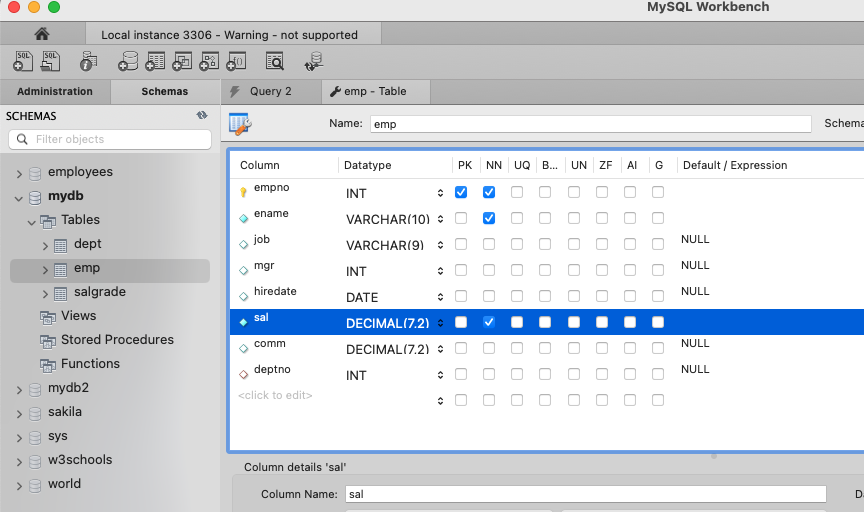

In [ ]:
-- !!!!!!! 'emp 테이블 수정'을 하고옴 !!!!!!
-- sal 필드와 ename 필드를 not null로 하기로  설정 및 저장 완
INSERT INTO emp(empno) values(9000);  -- error
-- error : SQL Error [1364] [HY000]: Field 'ename' doesn't have a default value

INSERT INTO emp(empno, ename, sal) 
VALUES(8000, '홍길동', 3300);  -- 설정했던 값들을 무조건 넣어주니 잘 들어간다.
SELECT * FROM emp; -- 확인

-- 한번에 여러명 넣기
INSERT INTO emp(empno, ename, sal) 
VALUES(8001, '둘리', 3200),
								(8002, '도우치', 3200),
								(8003, '또치', 3200);
SELECT * FROM emp; -- 확인


-- ==============================================
-- 데이터에 ' 가 들어가야 할 때  ==> ''
-- 'Tom's family'   ==>   'Tom''s family'    2개를 넣어준다.
-- 'Jane'   ===>    '''Jane'''                           3개를 양쪽으로 넣어준다???
INSERT INTO emp(empno, ename, sal) 
VALUES(8004, 'Tom''s fam', 3200),
								(8005, '''Jane''', 3200);
SELECT * FROM emp; -- 확인


-- 서버 : 서비스를 제공하는 측 (하드웨어 또는 소프트웨어)
-- 클라이언트 : 서비스를 제공받는 측(하드웨어 또는 소프트웨어) 
-- MS > (서버)  /  리눅스 > (Deamon) : 화면 UI 제공안하고 조용히 작동

In [ ]:
-- ==========================================
-- < create >

USE mydb;


CREATE TABLE emp2 AS SELECT * FROM emp;
-- 서브쿼리를 써서 테이블을 복사할 수 있다.
-- 제약조건은 안데려감 (primary key / forign key는 버리고)
DESC emp2;
SELECT * FROM emp2;


-- 구조만 복사하기
CREATE TABLE emp3 AS SELECT * FROM emp WHERE 1=0;
-- WHERE 1=0은 항상 거짓인 조건입니다.
-- 이 쿼리는 emp 테이블 구조(컬럼)만 복사하고 데이터는 복사하지 않겠다는 의미
-- SELECT * FROM emp WHERE 1=0 → 아무 행도 선택되지 않음 (왜냐하면 1=0은 절대 참이 아님)
-- 하지만 SELECT문의 컬럼 구조는 그대로 유지
DESC emp3;
SELECT * FROM emp3;


-- 특정 값만 가져와서 테이블 만들기  
CREATE TABLE emp4 AS  
SELECT empno, ename, sal 
FROM emp WHERE deptno IN (10, 20);  -- 부서에 대한 제약조건을 줌  
DESC emp4;
SELECT * FROM emp4;


-- 다른 테이블 값 복사  
SELECT * FROM emp3;

INSERT INTO emp3 (empno, ename, sal)
SELECT empno, ename, sal   -- 여기서부터 가져오고 싶은 것 선택하면 됩니다. 
FROM emp;

SELECT * FROM emp3;

In [ ]:
-- ==========================================
-- 문제 풀기

USE w3schools;

-- 문제1. customers 테이블의 구조를 복사한 후 customers2로 만들고,
									--  고객 아이디중에 3,23,21,45,67,89,54 복사하기 
CREATE TABLE customers2 AS SELECT * FROM customers WHERE 1=0;

SELECT * FROM customers2;
SELECT * FROM customers;

INSERT INTO customers2     -- 여기서부터 가져오고 싶은 것 선택하면 됩니다.
SELECT *  -- 여기서부터 가져오고 싶은 것 선택하면 됩니다. 
FROM customers
WHERE CustomerID IN(3,23,21,45,67,89,54);

SELECT * FROM customers2;

-- 문제1. 같이 풀어보기 
DESC customers;
INSERT INTO customers2(
				CustomerID,
				CustomerName,
				ContactName,
				Address,
				City,
				PostalCode,
				Country
)     -- 여기서부터 가져오고 싶은 것 선택하면 됩니다.
SELECT * 			 -- 여기서부터 가져오고 싶은 것 선택하면 됩니다. 
FROM customers
WHERE CustomerID IN(3,23,21,45,67,89,54);

SELECT * FROM customers2;


-- --------------------------------------------------------------------
-- 문제2. 고객아이디중에 4,5,11,33,42,43,56,57,58번을 이동하기 
									--        customers -> customers2 로 옮기기 
SELECT * FROM customers;
-- 사실 이동은 없다. 이것도 그냥 복사해가고, 기존 것을 삭제해주는 것이 이동이다.

INSERT INTO customers2    
SELECT *  
FROM customers
WHERE CustomerID IN(4,5,11,33,42,43,56,57,58);

SELECT * FROM customers2;

-- 여기서 foreign key때문에 삭제가 안됩니다.
DELETE FROM customers
WHERE customerid IN (4,5,11,33,42,43,56,57,58);
-- foreign key constraint fails

-- = 결국 삭제는 키를 제거하지 않는 이상 못한다.



-- -------------------------------------------------------
-- 문제3. 제품가격이 100$를 넘는 제품을 구매한 고객 리스트 
SELECT * FROM products;
SELECT * FROM orderdetails;
SELECT * FROM orders;
SELECT * FROM customers;

SELECT A.price, D.CustomerName
FROM products A
INNER JOIN orderdetails B ON A.ProductID = B. ProductID
INNER JOIN orders C ON B.orderID = C.orderID
INNER JOIN customers D ON C.customerID = D.customerID
WHERE  A.price > 100

-- 문제3. 같이 풀어보기  
SELECT A.orderid, D.customerName, C.price
FROM ORDERS A
INNER JOIN orderdetails B ON A.orderID = B. orderID
INNER JOIN products C ON B.ProductID = C. ProductID
INNER JOIN customers D ON A.customerID = D.customerID
WHERE  C.price > 100



-- -------------------------------------------------------
-- 문제4. orderdetails테이블의 quantity가 제품을 구매한 수량이고 product테이블의 있는 price 가 단가이다.
--        구매한 고객이름과, 제품명, 제품전체가액을 구하시오 
--      예) 홍길동    가구     quiantity 와 price 가 곱해져야 한다. 
SELECT * FROM orders;
SELECT * FROM customers;

SELECT * FROM orderdetails;
SELECT * FROM products;
 
SELECT 
					B.CustomerName, 
					D.productName, 
					C.quantity, 
					D.price, 
					(C.quantity * D.price) AS sum
FROM orders A
INNER JOIN customers B ON A.customerID = B.customerID
INNER JOIN orderdetails C ON A.orderID = C.orderID
INNER JOIN products D ON C.productID = D.productID;

-- 잘 못 생각했던 서브쿼리를 사용하려고 했었다...
-- ( 
-- 			SELECT (A.quantity * B.price) AS sum
-- 			FROM orderdetails A
-- 			INNER JOIN products B ON A.productID = B.productID
-- )



-- -------------------------------------------------------
-- 문제5. 핀란드에 있는 공급자 리스트 가져오기  (Finland)
SELECT * FROM customers;
SELECT * FROM suppliers;

SELECT * 
FROM suppliers
WHERE country = 'Finland';


-- 문제5. 같이 풀어보기
-- distinct 뒤에 나오는 필드값을 중복을 배제하는 명령
SELECT DISTINCT country, suppliername FROM suppliers;
-- distinct는 country와 supliername 를 조합해서 유일한 데이


-- -------------------------------------------------------
-- 문제6. 카테고리 제품이 seafood 인 제품의 구매자 리스트를 조회하시오 
SELECT * FROM categories;
SELECT * FROM products;
SELECT * FROM orderdetails;
SELECT * FROM orders;
SELECT * FROM customers;

SELECT A.categoryName, B.productName, E.customerName
FROM categories A
INNER JOIN products B ON A.categoryID = B. categoryID
INNER JOIN orderdetails C ON B.productID = C.productID
INNER JOIN orders D ON C.orderID = D.orderID
INNER JOIN customers E ON D.customerID = E.customerID
-- WHERE  A.categoryName = 'Seafood';
WHERE  lower(A.categoryName) = 'Seafood';



<br><br><br><br>

# 🟩 5월 20일 과제

1. customers table에서 나라가 Germany 인 나라의 정보 전체
2. customers table에서 Austria, USA, Poland, Denmark에 사는 고객 리스트 
3. 각자 나라별로 고객이 몇명씩 있는지 확인  
4. 나라별로 고객이 5명이 이상인 나라 목록 
5. 나라이름이 B로 시작하는 나라들의 전체 합  
6. 나라는 UK  /  도시명은 London에 있는 고객 이름 목록 
7. 주문날짜가 '1996-07-01' ~ '1996-09-30' 일까지의 주문아이디와 고객이름  
8. 위의 7번 문제를 고객이름 오름차순으로 정렬하여 출력하기 
9. 배달자가 Federal Shipping 인 경우의 상품명 가격 수량만 출력 

In [ ]:
USE w3schools;

-- 보기용  
-- SELECT DISTINCT country FROM customers;
-- SELECT * FROM categories;
-- SELECT * FROM products;
-- SELECT * FROM orderdetails;
-- SELECT * FROM orders;
-- SELECT * FROM customers;

-- 1. customers table에서 나라가 Germany 인 나라의 정보 전체
SELECT * FROM customers;

SELECT * 
FROM customers
WHERE country = 'Germany';


-- 2. customers table에서 Austria, USA, Poland, Denmark에 사는 고객 리스트 
SELECT * FROM customers;

SELECT customerName, Country
FROM customers
WHERE country in ('Germany', 'USA', 'Poland', 'Denmark');


-- 3. 각자 나라별로 고객이 몇명씩 있는지 확인
SELECT * FROM customers;

SELECT country, count(*)
FROM customers
GROUP BY country;


-- 4. 나라별로 고객이 5명이 이상인 나라 목록
SELECT * FROM customers;

SELECT country, count(*) customer
FROM customers
GROUP BY country
HAVING customer >  5;


-- 5. 나라이름이 B로 시작하는 나라들의 전체 합
SELECT country FROM customers;

-- SELECT country, count(*)
-- FROM customers
-- GROUP BY country
-- HAVING country LIKE 'B%';

SELECT count(*)
FROM customers
WHERE country LIKE 'B%';



-- 6. 나라는 UK  /  도시명은 London 에 있는 고객 이름 목록
SELECT * FROM customers;

SELECT country, city, customerName
FROM customers
WHERE country = 'UK' AND city = 'London';


-- 7. 주문날짜가 '1996-07-01' ~ '1996-09-30' 일까지의 주문아이디와 고객이름
SELECT * FROM orders;

SELECT A.orderDate, A.orderID, B.customerName
FROM orders A
INNER JOIN customers B ON A.customerID = B.customerID
WHERE  YEAR(orderDate) = '1996' and  month(orderDate) IN ('07', '08', '09');


SELECT A.orderDate, A.orderID, B.customerName
FROM orders A
INNER JOIN customers B ON A.customerID = B.customerID
WHERE A.orderDate >= '1996-07-01' AND A.orderDate <= '1996-09-30';



-- 8. 위의 7번 문제를 고객이름 오름차순으로 정렬하여 출력하기 
SELECT A.orderDate, A.orderID, B.customerName
FROM orders A
INNER JOIN customers B ON A.customerID = B.customerID
WHERE  YEAR(orderDate) = '1996' and  month(orderDate) IN ('07', '08', '09')
ORDER BY B.customerName DESC;


-- 9. 배달자가 Federal Shipping 인 경우의 상품명 가격 수량만
SELECT * FROM products;
SELECT * FROM shippers;
SELECT * FROM orderdetails;

SELECT F.shipperName, B.productName, B.price, C.quantity
FROM categories A
INNER JOIN products B ON A.categoryID = B. categoryID
INNER JOIN orderdetails C ON B.productID = C.productID
INNER JOIN orders D ON C.orderID = D.orderID
INNER JOIN customers E ON D.customerID = E.customerID
INNER JOIN shippers F ON D.shipperID = F.shipperID
WHERE  F.shipperName = 'Federal Shipping';